# Dimensionality Reduction

<div class="alert alert-success">
Dimensionality reduction is the process of transforming a dataset to a lower dimensional space. 
</div>

<div class="alert alert-info">
For an explainer on dimensionality reduction, with examples in real data, go
<a href="http://colah.github.io/posts/2014-10-Visualizing-MNIST/" class="alert-link">here</a>.
</div>

### Overview of Dimensionality Reduction

Datasets can be very large, containing not only potentially millions of data points, but also potentially very large numbers of features about each data point. We can consider each feature of our dataset to be a 'dimension'. For large-dimensional data, we may want to, or need to, try to reduce this number of dimensions. 

The simplest way to do so could simply be to drop some dimensions, and we could even choose to drop the dimensions that seem likely to be the least useful. This would be a simple method of dimensionality reduction. 

Typically though, we want to reduce the number of the dimensions in a way that preserves the most information. One way to do so could be clustering - if we run a clustering analysis on high dimensional data, we could re-code the data to store each point by it's cluster label, potentially maintaining more information in a smaller number of dimensions. 

Here we will explore another common method for dimensionality reduction - Principal Component Analysis (PCA). 

<div class="alert alert-success">
Principal Component Analysis (PCA) is procedure to transform a dataset into principle components, ordered by how much variance they capture.
</div>

<div class="alert alert-info">
For a paper that covers a full tutorial of PCA, go 
<a href="https://arxiv.org/pdf/1404.1100.pdf" class="alert-link">here</a>.
For a more technical overview and explainer, check out this 
<a href="http://alexhwilliams.info/itsneuronalblog/2016/03/27/pca/" class="alert-link">post</a>.
</div>

### Principle Component Analysis

To use PCA for Dimensionality Reduction, we can choose to preserve _n_ components, where _n_ is a number lower than the original dimensionality of our data set. 

By transforming our data with PCA, and keeping _n_ components, we are able to keep the most variance of the original data in our lower dimensional space.

Most broadly, PCA seeks to take advantage of the correlational structure of the variables, and uses this structure to encode the data. 

For example, if feature $x_1$ and $x_2$ of our data are correlated, PCA looks for how it could re-organize the data into some new dimension $x_pc$ which captures most of the shared variance (correlated structure) between the two. 

In this notebook, we will work through a simple PCA example, with a simple example of using PCA to perform PCA to go from 2D -> 1D data. 

In practice, PCA is most useful to go from _m_D -> _n_D data, where _m_ is very large, and _n_ < _m_. 

In [1]:
# Imports
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

In [2]:
## Create some random, correlated, data

# Settings
means = [50, 50]
covs = [[1, .75], [.75, 1]]
n = 1000

# Generate data
dat = np.random.multivariate_normal(means, covs, n)

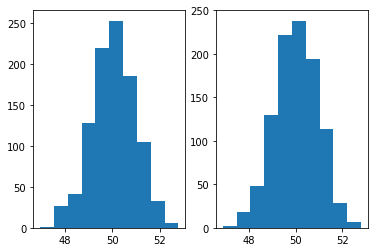

In [3]:
# Plot our two random variables
f, ax = plt.subplots(1, 2)
ax[0].hist(dat[:, 0]);
ax[1].hist(dat[:, 1]);

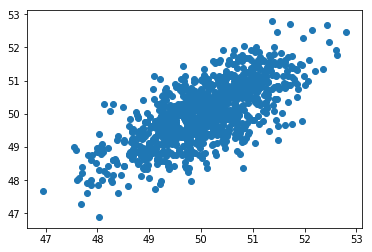

In [4]:
# Check out how the data relates to each other
plt.scatter(dat[:, 0], dat[:, 1])

## Task:

Let's say that we want or need a lower dimensional representation of our data for some further analysis. 

Instead of simply choosing a subset of dimensions though, dimensionality reduction is the process of trying to capture the most information from the original space, in a smaller number of dimensions.

Note: here we are going from 2D -> 1D for simplicity, and convenience. In practice is most useful when you have an intractably large number of dimensions, say 20,000, and want to transform the data into a lower dimensional space (that captures the most information you can), but is much more manageable, containing, perhaps closer to 20 dimensions. 

Here we will use Principal Components Analysis (PCA) for dimensionality reduction.

In [5]:
# Initialize the PCA model, here specifying 1 component
pca = PCA(n_components=1, whiten=True)

In [6]:
# Fit the PCA model, and apply it to transform the data
out = pca.fit_transform(dat)

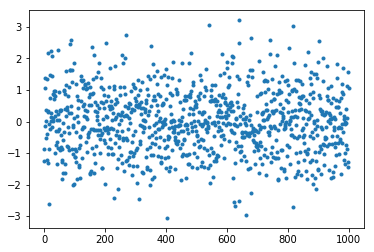

In [7]:
# Check out the transformed data, in the new space
#  Note: since the new data is 1D, the x-axis here is just index number
plt.plot(out, '.')

<div class="alert alert-info">
For a more in depth tutorial on doing PCA in Python, go
<a href="https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60" class="alert-link">here</a>,
and for a more technical orientation tutorial, go
<a href="http://sebastianraschka.com/Articles/2015_pca_in_3_steps.html" class="alert-link">here</a>.
</div>